<a href="https://colab.research.google.com/github/BusinessAnalyticsHub/Bootcamp_3ed/blob/main/Projeto_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving santa_tereza.xlsx to santa_tereza.xlsx
Saving mucum.xlsx to mucum.xlsx
Saving encantado.xlsx to encantado.xlsx


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install openpyxl

import pandas as pd

encantado = pd.read_excel('encantado.xlsx')
santa_tereza = pd.read_excel('santa_tereza.xlsx')
mucum = pd.read_excel('mucum.xlsx')

print("Dados Encantado")
print(encantado.head())

print("\nDados Santa Tereza")
print(santa_tereza.head())

print("\nDados Muçum")
print(mucum.head())

Dados Encantado
             Data/Hora  Chuva  Nivel  Vazao  Bateria  Temp
0  28/10/2024 15:15:00    0.0   70.0    NaN     28.9  21.3
1  28/10/2024 15:00:00    0.0   71.0    NaN     28.9  21.3
2  28/10/2024 14:45:00    0.0   71.0    NaN     28.8  21.3
3  28/10/2024 14:30:00    0.0   72.0    NaN     28.7  21.3
4  28/10/2024 14:15:00    0.0   72.0    NaN     28.6  21.3

Dados Santa Tereza
             Data/Hora  Chuva  Nivel  Vazao  Bateria  Temp
0  28/10/2024 14:45:00    0.0  212.0    NaN     14.0  33.6
1  28/10/2024 14:30:00    0.0  211.0    NaN     14.0  33.6
2  28/10/2024 14:15:00    0.0  210.0    NaN     14.0  33.6
3  28/10/2024 14:00:00    0.0  210.0    NaN     14.0  33.6
4  28/10/2024 13:45:00    0.0  209.0    NaN     14.0  32.3

Dados Muçum
             Data/Hora  Chuva  Nivel   Vazao  Bateria  Temp
0  28/10/2024 14:45:00    0.0  228.0  266.26     14.2  28.7
1  28/10/2024 14:30:00    0.0  227.0  263.79     14.2  28.7
2  28/10/2024 14:15:00    0.0  227.0  263.79     14.2  28.7
3  

In [ ]:
santa_tereza = pd.read_excel('santa_tereza.xlsx', parse_dates=['Data/Hora'])
mucum = pd.read_excel('mucum.xlsx', parse_dates=['Data/Hora'])
encantado = pd.read_excel('encantado.xlsx', parse_dates=['Data/Hora'])

<ipython-input-3-a4759597d82b>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  santa_tereza = pd.read_excel('santa_tereza.xlsx', parse_dates=['Data/Hora'])
<ipython-input-3-a4759597d82b>:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  mucum = pd.read_excel('mucum.xlsx', parse_dates=['Data/Hora'])
<ipython-input-3-a4759597d82b>:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  encantado = pd.read_excel('encantado.xlsx', parse_dates=['Data/Hora'])


In [ ]:
# Valores faltantes
na_counts = santa_tereza.isna().sum()
print('Santa Tereza:\n', na_counts)

na_counts = mucum.isna().sum()
print('Muçum:\n', na_counts)

na_counts = encantado.isna().sum()
print('Encantado:\n', na_counts)


Santa Tereza:
 Data/Hora        0
Chuva            7
Nivel           12
Vazao        17334
Bateria          0
Temp             0
dtype: int64
Muçum:
 Data/Hora    0
Chuva        5
Nivel        1
Vazao        1
Bateria      0
Temp         0
dtype: int64
Encantado:
 Data/Hora       0
Chuva          63
Nivel        9023
Vazao        6114
Bateria         6
Temp          101
dtype: int64


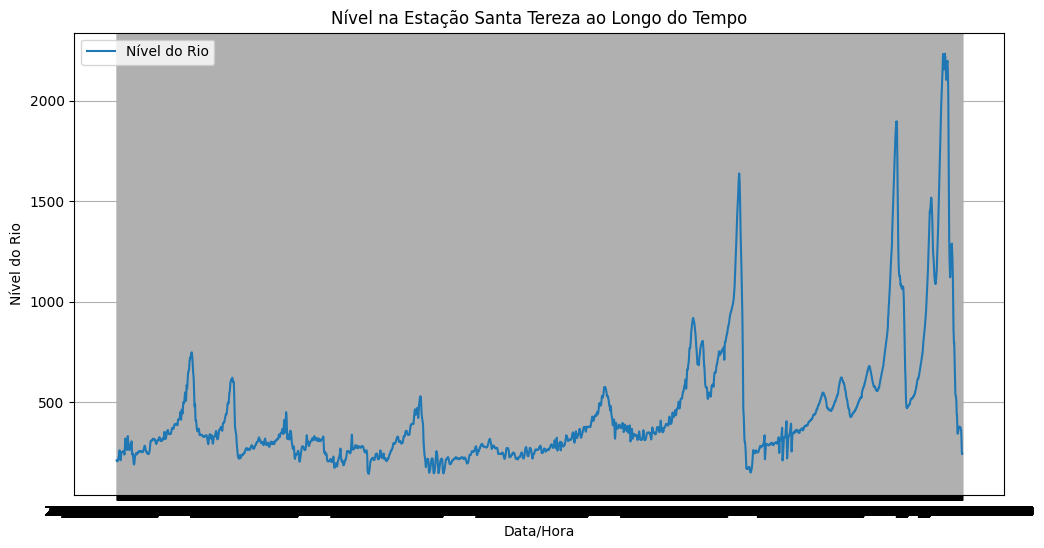

In [ ]:
# Análise de Sazonalidade e Tendência - Santa Tereza
plt.figure(figsize=(12, 6))
sns.lineplot(data=santa_tereza, x='Data/Hora', y='Nivel', label='Nível do Rio')
plt.title('Nível na Estação Santa Tereza ao Longo do Tempo')
plt.xlabel('Data/Hora')
plt.ylabel('Nível do Rio')
plt.legend()
plt.grid()
plt.show()

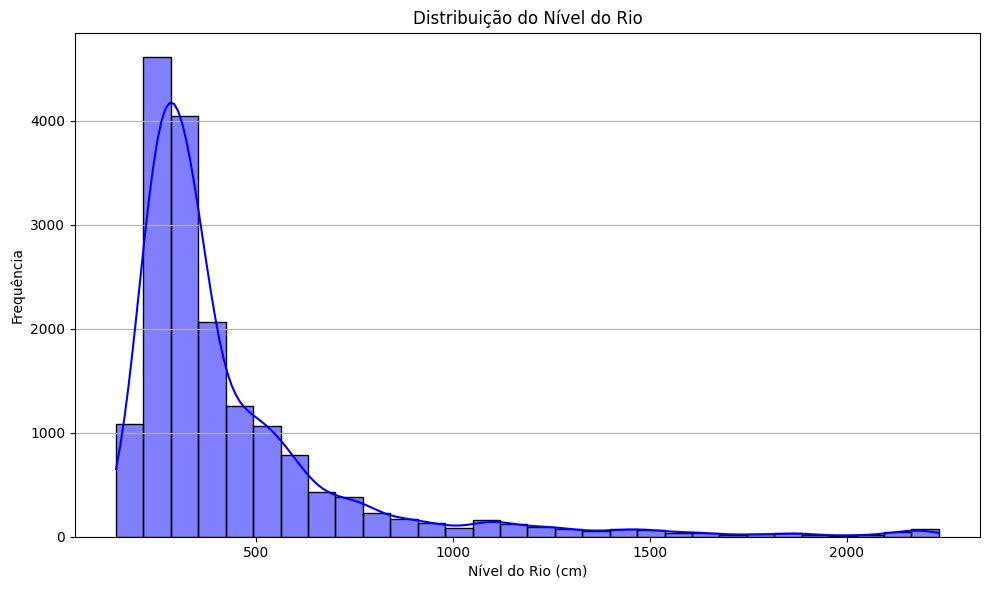

In [ ]:
# Análise Exploratória
plt.figure(figsize=(10, 6)) #histograma da variável "Nivel"
sns.histplot(santa_tereza['Nivel'], bins=30, kde=True, color='blue') #Kernel Density Estimate

plt.title('Distribuição do Nível do Rio')
plt.xlabel('Nível do Rio (cm)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [ ]:
# Descritivas
variaveis_relevantes = ['Chuva', 'Nivel', 'Bateria', 'Temp']
tabela_descritiva = santa_tereza[variaveis_relevantes].describe()
print(tabela_descritiva)

              Chuva         Nivel       Bateria          Temp
count  17327.000000  17322.000000  17334.000000  17334.000000
mean       0.097778    438.659450     13.308792     17.825291
std        0.607988    310.923175      0.603424      5.833200
min        0.000000    146.000000     12.700000      1.200000
25%        0.000000    266.250000     12.900000     13.700000
50%        0.000000    333.000000     12.900000     17.900000
75%        0.000000    489.000000     13.900000     20.900000
max       25.600000   2233.000000     14.600000     38.400000


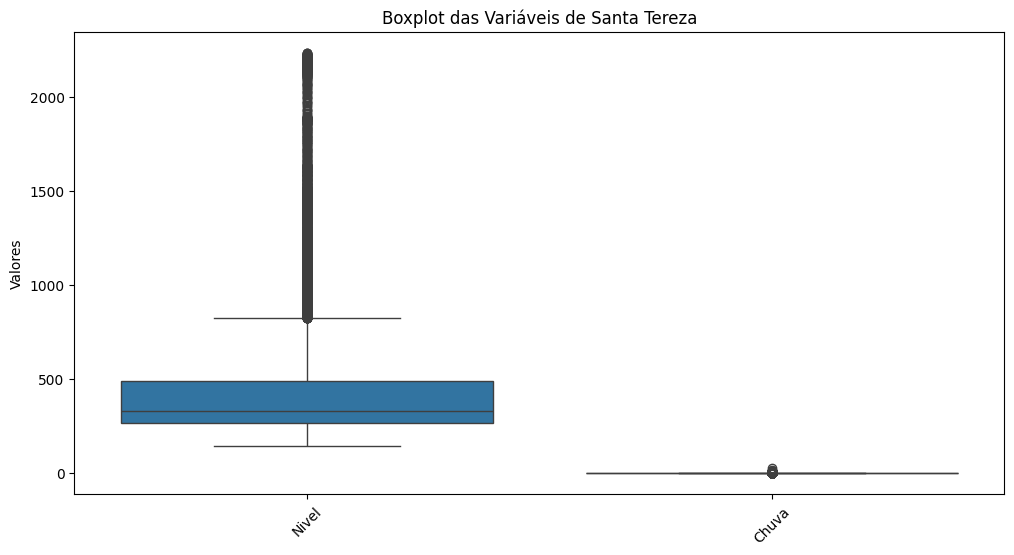

In [ ]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=santa_tereza[['Nivel', 'Chuva']])
plt.title('Boxplot das Variáveis de Santa Tereza')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

In [ ]:
def count_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)].count()

# Contar outliers para cada variável de interesse
outlier_counts = {col: count_outliers(santa_tereza[col]) for col in ['Nivel', 'Chuva']}
print("Número de Outliers em cada variável de Santa Tereza:")
for var, count in outlier_counts.items():
    print(f"{var}: {count} outliers")

Número de Outliers em cada variável de Santa Tereza:
Nivel: 1412 outliers
Chuva: 1598 outliers


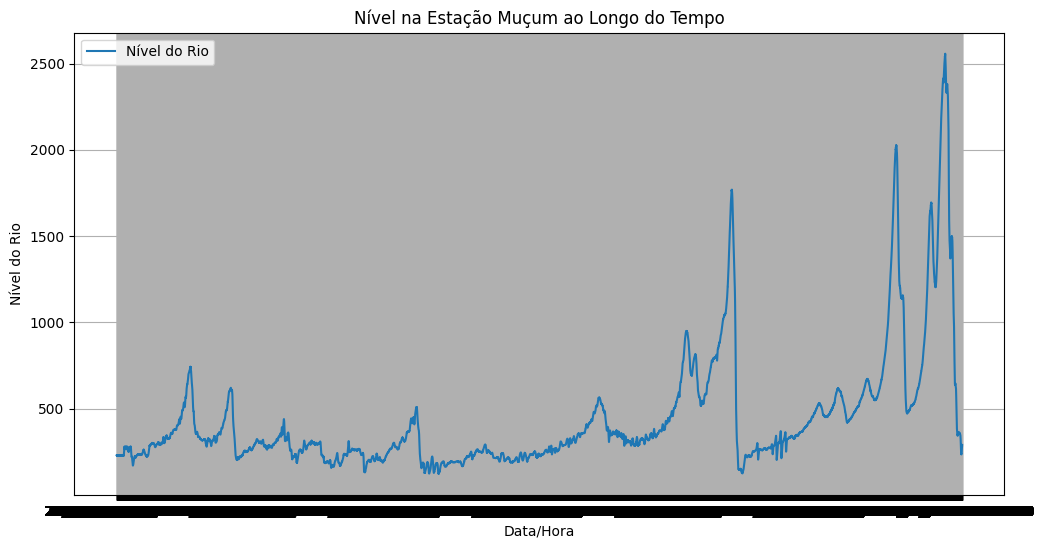

In [ ]:
# Análise de Sazonalidade e Tendência - Muçum
plt.figure(figsize=(12, 6))
sns.lineplot(data=mucum, x='Data/Hora', y='Nivel', label='Nível do Rio')
plt.title('Nível na Estação Muçum ao Longo do Tempo')
plt.xlabel('Data/Hora')
plt.ylabel('Nível do Rio')
plt.legend()
plt.grid()
plt.show()

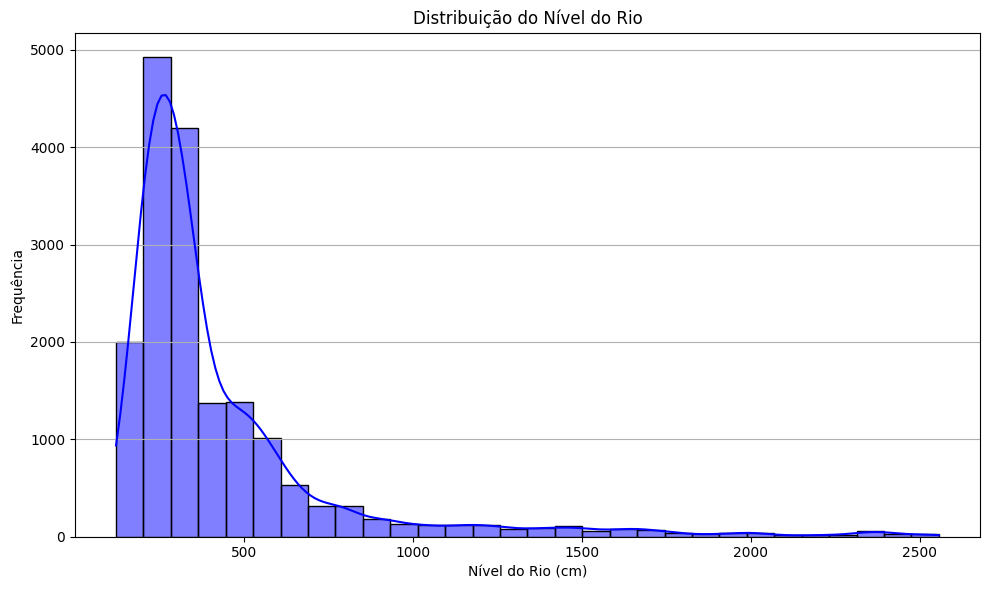

In [ ]:
# Análise Exploratória
plt.figure(figsize=(10, 6)) #histograma da variável "Nivel"
sns.histplot(mucum['Nivel'], bins=30, kde=True, color='blue') #Kernel Density Estimate

plt.title('Distribuição do Nível do Rio')
plt.xlabel('Nível do Rio (cm)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [ ]:
# Descritivas
variaveis_relevantes = ['Chuva', 'Nivel', 'Vazao', 'Bateria', 'Temp']
tabela_descritiva = mucum[variaveis_relevantes].describe()
print(tabela_descritiva)

              Chuva         Nivel         Vazao       Bateria          Temp
count  17540.000000  17544.000000  17544.000000  17545.000000  17545.000000
mean       0.101961    434.923963   1108.104798     13.320245     17.852454
std        0.672843    356.174545   1747.073659      0.642185      5.393261
min        0.000000    122.000000     71.270000     12.700000      3.700000
25%        0.000000    241.000000    298.390000     12.800000     14.100000
50%        0.000000    315.000000    508.470000     12.900000     18.100000
75%        0.000000    485.000000   1134.907500     13.900000     20.900000
max       19.800000   2557.000000  13241.500000     14.700000     36.500000


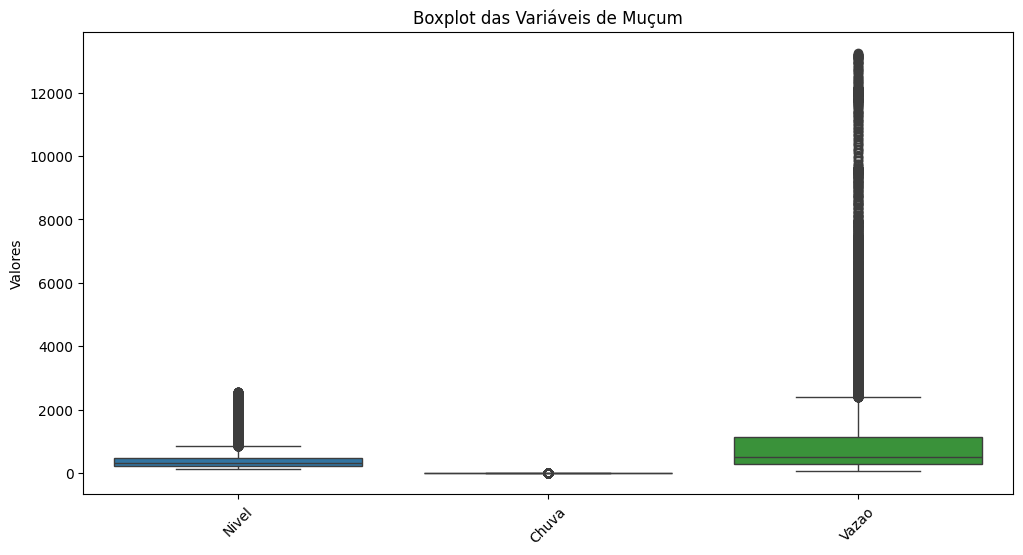

In [ ]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=mucum[['Nivel', 'Chuva','Vazao']])
plt.title('Boxplot das Variáveis de Muçum')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

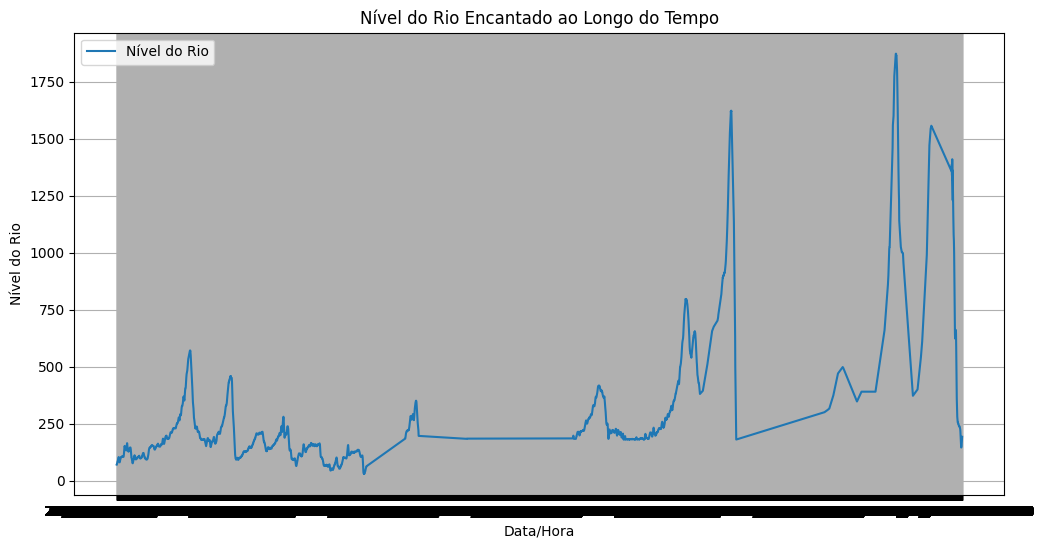

In [ ]:
# Análise de Sazonalidade e Tendência - Encantado
plt.figure(figsize=(12, 6))
sns.lineplot(data=encantado, x='Data/Hora', y='Nivel', label='Nível do Rio')
plt.title('Nível do Rio Encantado ao Longo do Tempo')
plt.xlabel('Data/Hora')
plt.ylabel('Nível do Rio')
plt.legend()
plt.grid()
plt.show()

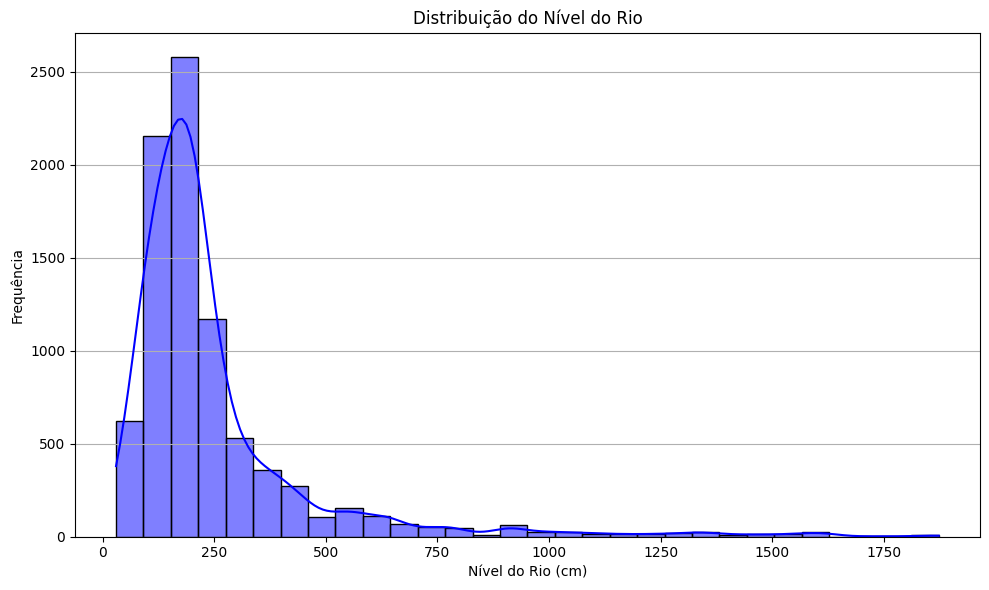

In [ ]:
# Análise Exploratória
plt.figure(figsize=(10, 6)) #histograma da variável "Nivel"
sns.histplot(encantado['Nivel'], bins=30, kde=True, color='blue') #Kernel Density Estimate

plt.title('Distribuição do Nível do Rio')
plt.xlabel('Nível do Rio (cm)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.tight_layout()

plt.show()

In [ ]:
# Descritivas
variaveis_relevantes = ['Chuva', 'Nivel', 'Vazao', 'Bateria', 'Temp']
tabela_descritiva = encantado[variaveis_relevantes].describe()
print(tabela_descritiva)

              Chuva        Nivel         Vazao       Bateria          Temp
count  17481.000000  8521.000000  11430.000000  17538.000000  17443.000000
mean       0.091459   252.940969    472.129173     16.174729     17.079218
std        0.572542   231.048259   1210.615001      4.918617      4.078445
min        0.000000    30.000000      0.110000      3.600000      1.900000
25%        0.000000   136.000000    109.220000     12.900000     14.700000
50%        0.000000   187.000000    113.380000     14.100000     17.400000
75%        0.000000   268.000000    236.850000     19.000000     19.500000
max       17.000000  1873.000000  13375.660000     36.400000     34.600000


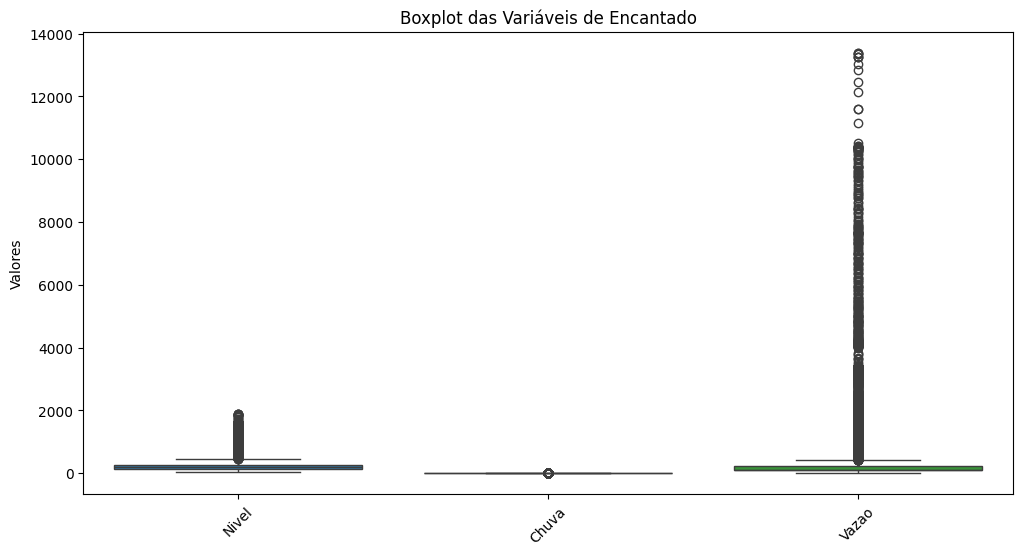

In [ ]:
# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=encantado[['Nivel', 'Chuva', 'Vazao']])
plt.title('Boxplot das Variáveis de Encantado')
plt.ylabel('Valores')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Excluir a variável 'vazão' para Santa Tereza (não tem nada preenchido)
santa_tereza.drop(columns=['Vazao'], inplace=True, errors='ignore')

# Mesclar Dados das Estações
df = pd.merge(pd.merge(santa_tereza, mucum, on='Data/Hora', suffixes=('_santa', '_mucum')), encantado, on='Data/Hora')
df.rename(columns={'chuva': 'chuva_encantado', 'nivel': 'nivel_encantado'}, inplace=True)
df.rename(columns={'Vazao_x': 'Vazao_Mucum'}, inplace=True)
df

,Data/Hora,Chuva_santa,Nivel_santa,Bateria_santa,Temp_santa,Chuva_mucum,Nivel_mucum,Vazao_Mucum,Bateria_mucum,Temp_mucum,Chuva,Nivel,Vazao_y,Bateria,Temp
0,28/10/2024 14:45:00,0.0,212.0,14.0,33.6,0.0,228.0,266.26,14.2,28.7,0.0,71.0,NaN,28.8,21.3
1,28/10/2024 14:30:00,0.0,211.0,14.0,33.6,0.0,227.0,263.79,14.2,28.7,0.0,72.0,NaN,28.7,21.3
2,28/10/2024 14:15:00,0.0,210.0,14.0,33.6,0.0,227.0,263.79,14.2,28.7,0.0,72.0,NaN,28.6,21.3
3,28/10/2024 14:00:00,0.0,210.0,14.0,33.6,0.0,226.0,261.34,14.2,28.7,0.0,72.0,NaN,28.5,21.3
4,28/10/2024 13:45:00,0.0,209.0,14.0,32.3,0.0,228.0,266.26,14.2,27.7,0.0,73.0,NaN,28.4,21.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17306,28/04/2024 16:45:00,0.0,247.0,13.8,22.0,0.0,270.0,375.40,14.2,20.4,0.0,178.0,101.1,13.6,20.2
17307,28/04/2024 16:30:00,0.0,245.0,13.8,22.0,0.0,273.0,383.70,14.2,20.4,0.0,181.0,107.2,13.6,20.2
17308,28/04/2024 16:15:00,0.0,244.0,13.8,22.0,0.0,279.0,400.50,14.2,20.4,0.0,185.0,115.5,14.0,20.5
17309,28/04/2024 16:00:00,0.0,243.0,13.8,22.0,0.0,282.0,409.00,14.2,20.4,0.0,188.0,121.9,14.0,20.5


In [ ]:
#número de NaN
na_counts = df.isna().sum()
print(na_counts)

Data/Hora           0
Chuva_santa         7
Nivel_santa        12
Bateria_santa       0
Temp_santa          0
Chuva_mucum         5
Nivel_mucum         1
Vazao_Mucum         1
Bateria_mucum       0
Temp_mucum          0
Chuva              59
Nivel            8805
Vazao_y          5895
Bateria             3
Temp               98
dtype: int64


In [ ]:
# Valores Faltantes (1 ALTERNATIVA)
df.fillna(method='ffill', inplace=True)
df.fillna(method='bfill', inplace=True)


<ipython-input-19-4c26a0afd8df>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-19-4c26a0afd8df>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='bfill', inplace=True)


In [ ]:
# Análise Descritiva
print("Resumo Estatístico das Variáveis:")
print(df.describe())

Resumo Estatístico das Variáveis:
        Chuva_santa   Nivel_santa  Bateria_santa    Temp_santa   Chuva_mucum  \
count  17304.000000  17299.000000   17311.000000  17311.000000  17306.000000   
mean       0.097908    438.395110      13.309104     17.824401      0.102912   
std        0.608381    310.484282       0.603586      5.834106      0.677076   
min        0.000000    146.000000      12.700000      1.200000      0.000000   
25%        0.000000    267.000000      12.900000     13.700000      0.000000   
50%        0.000000    333.000000      12.900000     17.900000      0.000000   
75%        0.000000    489.000000      13.900000     20.900000      0.000000   
max       25.600000   2233.000000      14.600000     38.400000     19.800000   

        Nivel_mucum   Vazao_Mucum  Bateria_mucum    Temp_mucum         Chuva  \
count  17310.000000  17310.000000   17311.000000  17311.000000  17252.000000   
mean     433.533853   1102.709337      13.320334     17.851719      0.092557   
std  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

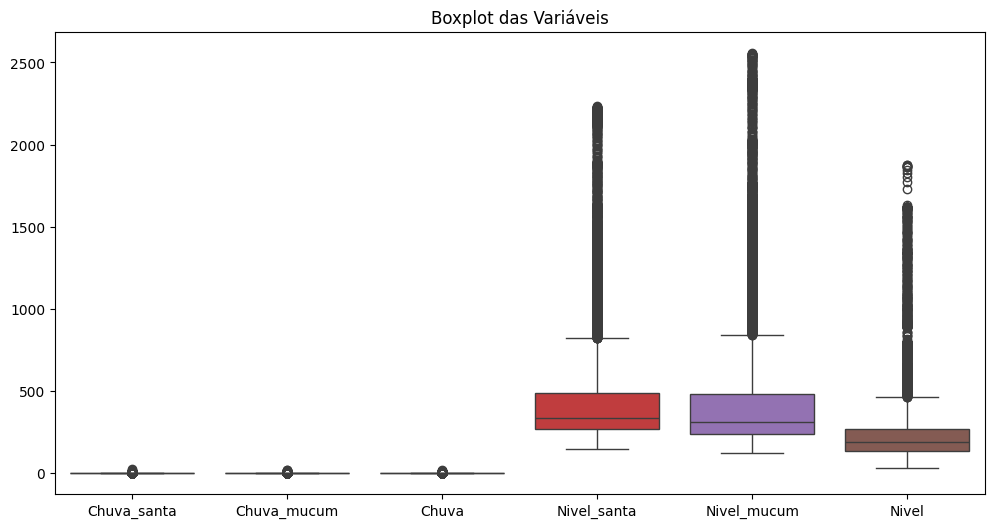

In [ ]:
# Boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Chuva_santa', 'Chuva_mucum', 'Chuva', 'Nivel_santa', 'Nivel_mucum', 'Nivel']])
plt.title("Boxplot das Variáveis")
plt.show()

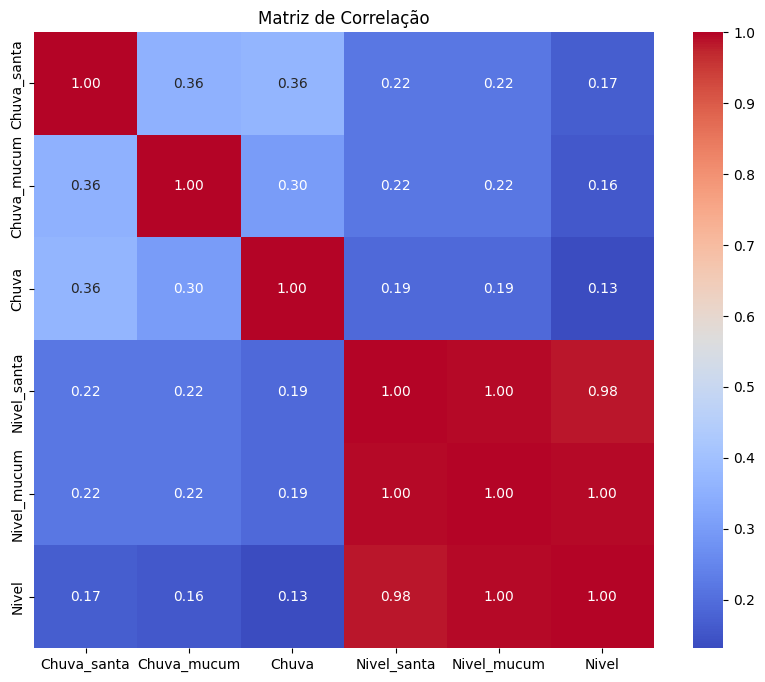

In [ ]:
# Análise de Correlação
correlation_matrix = df[['Chuva_santa', 'Chuva_mucum', 'Chuva', 'Nivel_santa', 'Nivel_mucum', 'Nivel']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
print(df.columns)

Index(['Data/Hora', 'Chuva_santa', 'Nivel_santa', 'Bateria_santa',
       'Temp_santa', 'Chuva_mucum', 'Nivel_mucum', 'Vazao_Mucum',
       'Bateria_mucum', 'Temp_mucum', 'Chuva', 'Nivel', 'Vazao_y', 'Bateria',
       'Temp'],
      dtype='object')


In [ ]:
# Converter a coluna 'Data/Hora' para datetime
df['Data/Hora'] = pd.to_datetime(df['Data/Hora'], errors='coerce')

In [ ]:
# Feature Engineering: Defasagem e Médias Móveis
def create_lag_features(df, cols, lags):
    for col in cols:
        for lag in range(1, lags + 1):
            df[f"{col}_lag{lag}"] = df[col].shift(lag)
    return df

def create_moving_average_features(df, cols, windows):
    for col in cols:
        for window in windows:
            df[f"{col}_ma{window}"] = df[col].rolling(window).mean()
    return df

df = create_lag_features(df, ['Chuva_santa', 'Chuva_mucum', 'Chuva', 'Nivel_santa', 'Nivel_mucum'], lags=3)
df = create_moving_average_features(df, ['Chuva_santa', 'Chuva_mucum', 'Chuva', 'Nivel_santa', 'Nivel_mucum'], windows=[3, 6, 12])
df

,Data/Hora,Chuva_santa,Nivel_santa,Bateria_santa,Temp_santa,Chuva_mucum,Nivel_mucum,Vazao_Mucum,Bateria_mucum,Temp_mucum,...,Chuva_mucum_ma12,Chuva_ma3,Chuva_ma6,Chuva_ma12,Nivel_santa_ma3,Nivel_santa_ma6,Nivel_santa_ma12,Nivel_mucum_ma3,Nivel_mucum_ma6,Nivel_mucum_ma12
0,28/10/2024 14:45:00,0.0,212.0,14.0,33.6,0.0,228.0,266.26,14.2,28.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28/10/2024 14:30:00,0.0,211.0,14.0,33.6,0.0,227.0,263.79,14.2,28.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,28/10/2024 14:15:00,0.0,210.0,14.0,33.6,0.0,227.0,263.79,14.2,28.7,...,NaN,0.0,NaN,NaN,211.000000,NaN,NaN,227.333333,NaN,NaN
3,28/10/2024 14:00:00,0.0,210.0,14.0,33.6,0.0,226.0,261.34,14.2,28.7,...,NaN,0.0,NaN,NaN,210.333333,NaN,NaN,226.666667,NaN,NaN
4,28/10/2024 13:45:00,0.0,209.0,14.0,32.3,0.0,228.0,266.26,14.2,27.7,...,NaN,0.0,NaN,NaN,209.666667,NaN,NaN,227.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17306,28/04/2024 16:45:00,0.0,247.0,13.8,22.0,0.0,270.0,375.40,14.2,20.4,...,0.0,0.0,0.0,0.283333,251.666667,261.500000,288.666667,267.333333,261.333333,251.583333
17307,28/04/2024 16:30:00,0.0,245.0,13.8,22.0,0.0,273.0,383.70,14.2,20.4,...,0.0,0.0,0.0,0.150000,247.666667,255.666667,280.916667,270.333333,264.666667,254.833333
17308,28/04/2024 16:15:00,0.0,244.0,13.8,22.0,0.0,279.0,400.50,14.2,20.4,...,0.0,0.0,0.0,0.083333,245.333333,251.166667,273.666667,274.000000,268.500000,258.333333
17309,28/04/2024 16:00:00,0.0,243.0,13.8,22.0,0.0,282.0,409.00,14.2,20.4,...,0.0,0.0,0.0,0.000000,244.000000,247.833333,267.083333,278.000000,272.666667,261.750000


In [ ]:
# Feature Engineering: Variáveis de Interação
df['chuva_total'] = df['Chuva_santa'] + df['Chuva_mucum'] + df['Chuva']
df['nivel_prod'] = df['Nivel_santa'] * df['Nivel_mucum']

# Remover valores nulos resultantes das operações de defasagem e médias móveis
df.dropna(inplace=True)
df

,Data/Hora,Chuva_santa,Nivel_santa,Bateria_santa,Temp_santa,Chuva_mucum,Nivel_mucum,Vazao_Mucum,Bateria_mucum,Temp_mucum,...,Chuva_ma6,Chuva_ma12,Nivel_santa_ma3,Nivel_santa_ma6,Nivel_santa_ma12,Nivel_mucum_ma3,Nivel_mucum_ma6,Nivel_mucum_ma12,chuva_total,nivel_prod
11,28/10/2024 12:00:00,0.0,208.0,14.1,30.4,0.0,226.0,261.34,14.3,26.5,...,0.0,0.000000,208.000000,208.166667,209.166667,226.666667,226.833333,227.000000,0.0,47008.0
12,28/10/2024 11:45:00,0.0,208.0,14.1,28.5,0.0,228.0,266.26,14.3,26.8,...,0.0,0.000000,208.000000,208.000000,208.833333,227.000000,227.000000,227.000000,0.0,47424.0
13,28/10/2024 11:30:00,0.0,208.0,14.1,28.5,0.0,227.0,263.79,14.3,26.8,...,0.0,0.000000,208.000000,208.000000,208.583333,227.000000,227.166667,227.000000,0.0,47216.0
14,28/10/2024 11:15:00,0.0,209.0,14.1,28.5,0.0,227.0,263.79,14.3,26.8,...,0.0,0.000000,208.333333,208.166667,208.500000,227.333333,227.000000,227.000000,0.0,47443.0
15,28/10/2024 11:00:00,0.0,209.0,14.1,28.5,0.0,226.0,261.34,14.3,26.8,...,0.0,0.000000,208.666667,208.333333,208.416667,226.666667,226.833333,227.000000,0.0,47234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17306,28/04/2024 16:45:00,0.0,247.0,13.8,22.0,0.0,270.0,375.40,14.2,20.4,...,0.0,0.283333,251.666667,261.500000,288.666667,267.333333,261.333333,251.583333,0.0,66690.0
17307,28/04/2024 16:30:00,0.0,245.0,13.8,22.0,0.0,273.0,383.70,14.2,20.4,...,0.0,0.150000,247.666667,255.666667,280.916667,270.333333,264.666667,254.833333,0.0,66885.0
17308,28/04/2024 16:15:00,0.0,244.0,13.8,22.0,0.0,279.0,400.50,14.2,20.4,...,0.0,0.083333,245.333333,251.166667,273.666667,274.000000,268.500000,258.333333,0.0,68076.0
17309,28/04/2024 16:00:00,0.0,243.0,13.8,22.0,0.0,282.0,409.00,14.2,20.4,...,0.0,0.000000,244.000000,247.833333,267.083333,278.000000,272.666667,261.750000,0.0,68526.0
